# Behavior Analysis of Hydra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

## 1. Coordinates of Hypostone and Peduncle

In [3]:
# load contents from the .csv files

data1_ = []; data2_ = []; data3_= []

# with open('data/testpoke4DeepCut_resnet50_testpoke4Mar14shuffle1_21000.csv', 'r') as f:
with open('data/hy78clip1DeepCut_resnet50_clip1Mar15shuffle1_57000.csv', 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        if reader.line_num == 1:
            continue
        data1_.append(item)
        
with open('data/hy78clip2DeepCut_resnet50_clip2Mar15shuffle1_172000.csv', 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        if reader.line_num == 1:
            continue
        data2_.append(item)
        
with open('data/hy78clip3DeepCut_resnet50_clip3Mar15shuffle1_210000.csv', 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        if reader.line_num == 1:
            continue
        data3_.append(item)

data_ = [data1_, data2_, data3_]        
        
# transform data 
del data1_[0:2]
data1 = np.double(np.array(data1_))
data1 = np.delete(data1, [0,3,6], axis=1)

del data2_[0:2]
data2 = np.double(np.array(data2_))
data2 = np.delete(data2, [0,3,6], axis=1)

del data3_[0:2]
data3 = np.double(np.array(data3_))
data3 = np.delete(data3, [0,3,6], axis=1)

In [4]:
length = np.max([len(data1),len(data2),len(data3)])
length2 = np.min([len(data1),len(data2),len(data3)])

data = np.zeros((length2, 3*4))

data[:,0:4] = data1[0:length2]
data[:,4:8] = data2[0:length2]
data[:,8:12] = data3[0:length2]

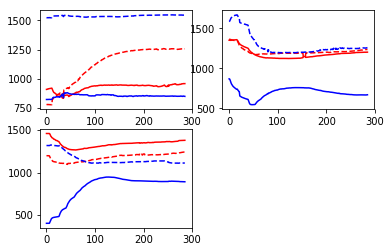

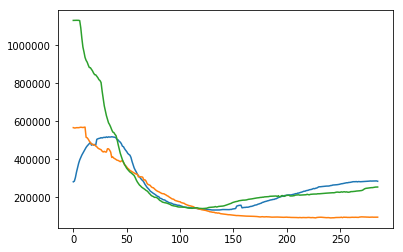

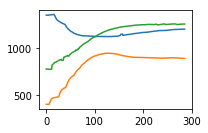

In [28]:
# plot coordinates
plt.figure()
plt.subplot(221)
plt.plot(data[:,0], 'r-', label='hypostone x')
plt.plot(data[:,1], 'r--', label='hypostone y')
plt.plot(data[:,2], 'b-', label='peduncle x')
plt.plot(data[:,3], 'b--', label='peduncle y')
# plt.legend()
plt.subplot(222)
plt.plot(data[:,4], 'r-', label='hypostone x')
plt.plot(data[:,5], 'r--', label='hypostone y')
plt.plot(data[:,6], 'b-', label='peduncle x')
plt.plot(data[:,7], 'b--', label='peduncle y')
# plt.legend()
plt.subplot(223)
plt.plot(data[:,8], 'r-', label='hypostone x')
plt.plot(data[:,9], 'r--', label='hypostone y')
plt.plot(data[:,10], 'b-', label='peduncle x')
plt.plot(data[:,11], 'b--', label='peduncle y')
# plt.legend()
plt.show()

plt.figure()
# plt.plot(data[:,4], data[:,5], 'ro', label='hypostone')
# plt.plot(data[:,6], data[:,7], 'bo', label='peduncle')
plt.plot((data[:,4]-data[:,6])**2 + (data[:,5]-data[:,7])**2)
plt.plot((data[:,0]-data[:,2])**2 + (data[:,1]-data[:,3])**2)
plt.plot((data[:,8]-data[:,10])**2 + (data[:,9]-data[:,11])**2)
plt.show()

plt.figure()
# plt.plot(data[:,4], data[:,5], 'ro', label='hypostone')
# plt.plot(data[:,6], data[:,7], 'bo', label='peduncle')
plt.subplot(221)
plt.plot(data[:,4])
plt.plot(data[:,10])
plt.plot(data[:,1])
plt.show()

## 2. Roundness

In [2]:
import pandas as pd

In [83]:
roundness_set = []

nclips = 7

for j in range(nclips):
    reader = pd.read_csv('data/hy78clip'+str(j+1)+'roidata.csv')
    roundness = np.array(np.double(reader['Unnamed: 19'][9:]))
    roundness_set.append(roundness)

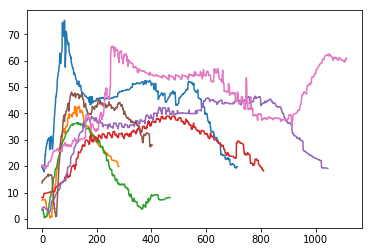

In [84]:
plt.figure()
for j in range(nclips):
    plt.plot(roundness_set[j])